In [1]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import font_manager, rc # 한글 폰트 사용

plt.rcParams["font.family"] = "malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

In [3]:
map = pd.read_csv('data/map_korea_0630.csv')
pop = pd.read_csv('data/인구_연령_0629.csv')
pop_1 = pd.read_csv('data/202305_주민등록인구및세대현황_읍면동.csv')

In [4]:
# map데이터 엑셀로 불러오기
import pandas as pd
import numpy as np
import os

In [5]:
# pip install openpyxl

In [6]:
from openpyxl import Workbook
wb = Workbook()

In [7]:
df = pd.read_excel('data/merge_인구_좌표.xlsx' ,engine='openpyxl')

In [8]:
df.to_csv('data/merge_인구_좌표.csv', index=False)
df = pd.read_csv('data/merge_인구_좌표.csv', encoding='utf-8', sep=',')

In [9]:
df.tail(40).head(20)

,광역시도,행정구역_x,shortName,면적,인구수,x,y,행정구역_y,신혼수_21,신혼증감_21,신혼증감률_21
221,경기도,김포시,김포,276.64,326523,2,3,김포시,11330,-404,-3.4
222,경기도,부천시,부천,53.44,805473,2,4,부천시,13850,-1224,-8.1
223,광주광역시,광산구,광산,222.88,389386,2,19,광산구,7369,-559,-7.1
224,광주광역시,서구,서구,46.73,297826,2,20,서구,4073,-501,-11.0
225,광주광역시,남구,남구,61.07,213743,2,21,남구,3062,-158,-4.9
226,인천광역시,계양구,계양,45.58,317785,2,5,계양구,4071,-134,-3.2
227,인천광역시,부평구,부평,32.00,527153,2,6,부평구,7860,-557,-6.6
228,인천광역시,미추홀구,미추홀,24.47,388535,2,7,미추홀구,6541,-71,-1.1
229,인천광역시,남동구,남동,56.90,505791,2,8,남동구,8017,-1039,-11.5
230,전라남도,장성군,장성,518.65,38578,2,17,장성군,418,-73,-14.9


In [10]:
# 맵을 그리기위한 코드-> 함수

def mapping(targetData, blockedMap, d1, d2, cmapname):
    gamma = 0.75
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    datalabel = targetData
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    # k_name_list = []
    # del_list = ['광주', '대구', '대전', '부산', '서울', '울산', '인천']
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
# for문 변형함 #####################################################################################
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2])
        if (len(row[d2]) <= 2 and row[d2][-1] == '구'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2])
        else:
            dispname = row[d2]
#####################################################################################
    # # for i in range(len(blockmap.idx)):
    #     if (len(bolckmap['shortName'][i]) >=3) and (bolckmap['shortName'][i][:2] in del_list):
    #         k_name_list.append(bolckmap['shortName'][i][2:])
    #     elif (len(bolckmap['shortName'][i]) >=5) and (bolckmap['shortName'][i][-1] == ')'):    # 고성(강원)
    #         k_name_list.append(bolckmap['shortName'][i][:2])
    #     else:
    #         k_name_list.append(bolckmap['shortName'][i])
    # blockmap['shortName'] = k_name_list
    # dispname = blockmap['shortName']
#######################################################################

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=1.5)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

In [11]:
df2 = pd.read_excel('data/merge_인구_좌표2.xlsx' ,engine='openpyxl')
df2.to_csv('data/merge_인구_좌표2.csv', index=False)
df2 = pd.read_csv('data/merge_인구_좌표2.csv', encoding='utf-8', sep=',')
df2.head(3)

,광역시도,행정구역_x,shortName,면적,인구수,x,y,행정구역_y,신혼수_21,신혼증감_21,신혼증감률_21
0,경기도,수원시,장안구,121.09,1125461,15,1,장안구,3917,18,0.5
1,경기도,수원시,권선구,121.09,1125461,15,2,권선구,7403,-830,-10.1
2,경기도,수원시,팔달구,121.09,1125461,15,3,팔달구,3188,499,18.6


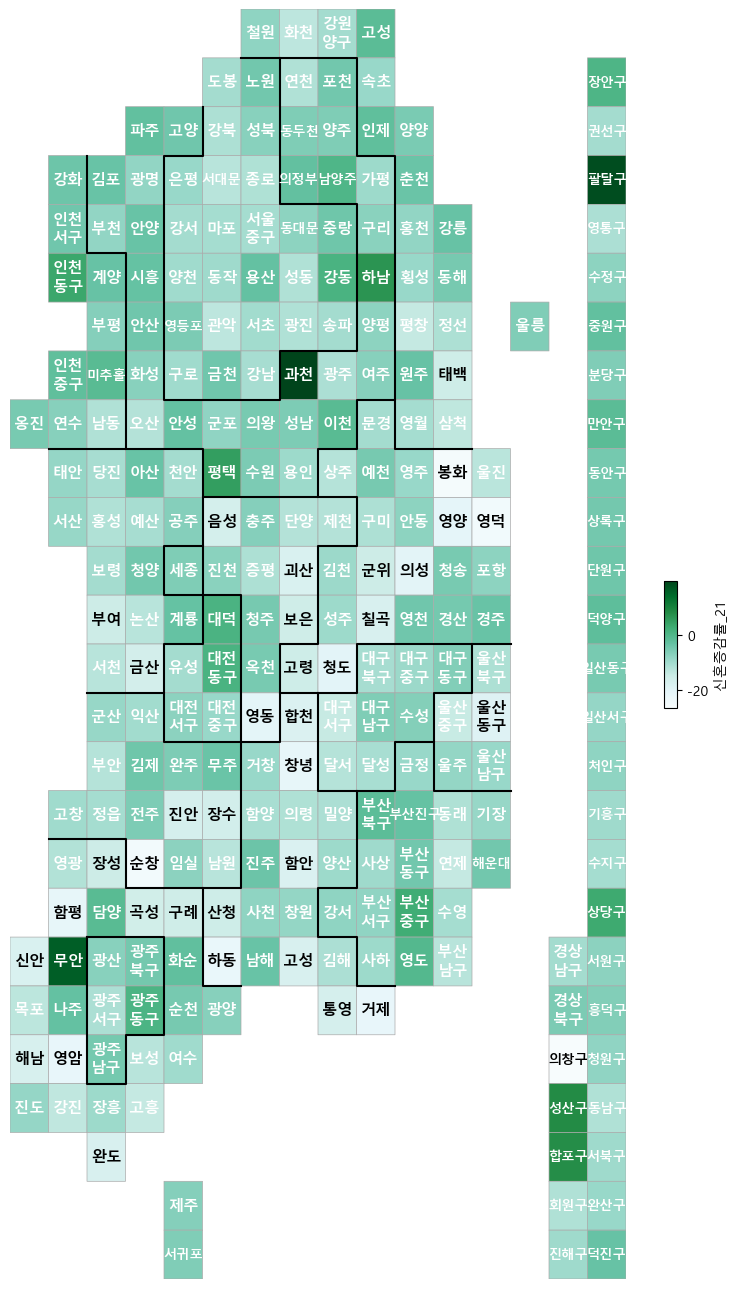

In [12]:
# 함수실행__ mapping(targetData, blockedMap, d1, d2, cmapname)
mapping('신혼증감률_21', df2, '광역시도' , 'shortName', 'BuGn')

In [13]:
############## 새로 생긴 '구'들 지도에 포함하기 ###############